In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/kaggle/input/primetrade-data/historical_data.csv")

In [43]:
fear_greed_index = pd.read_csv("/kaggle/input/primetrade-data/fear_greed_index.csv")

In [44]:
data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,TimestampIST_dt,Trade_Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02


In [45]:
fear_greed_index.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [46]:
data.info

<bound method DataFrame.info of                                            Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010

In [47]:
fear_greed_index.info

<bound method DataFrame.info of        timestamp  value classification        date
0     1517463000     30           Fear  2018-02-01
1     1517549400     15   Extreme Fear  2018-02-02
2     1517635800     40           Fear  2018-02-03
3     1517722200     24   Extreme Fear  2018-02-04
4     1517808600     11   Extreme Fear  2018-02-05
...          ...    ...            ...         ...
2639  1745818200     54        Neutral  2025-04-28
2640  1745904600     60          Greed  2025-04-29
2641  1745991000     56          Greed  2025-04-30
2642  1746077400     53        Neutral  2025-05-01
2643  1746163800     67          Greed  2025-05-02

[2644 rows x 4 columns]>

In [110]:
print("\n--- Unique values in 'Coin' column (Trader Data) ---")
unique_coins = data['Coin'].unique()
print(unique_coins)
print(f"Number of unique coin symbols: {len(unique_coins)}")


--- Unique values in 'Coin' column (Trader Data) ---
['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE'
 'ETH' 'kPEPE' 'TRUMP' 'ONDO' 'ENA' 'LINK' 'XRP' 'S' 'BNB' 'BERA' 'WIF'
 'LAYER' 'MKR' 'KAITO' 'IP' 'JUP' 'USUAL' 'ADA' 'BTC' 'PURR/USDC' 'ZRO'
 '@7' '@19' '@21' '@44' '@48' '@11' '@15' '@46' '@61' '@28' '@45' '@9'
 '@41' '@38' 'kSHIB' 'GRASS' 'TAO' 'AVAX' '@2' '@6' '@8' '@10' '@12' '@16'
 '@17' '@35' '@26' '@24' '@32' '@29' '@31' '@33' '@34' '@36' '@37' '@47'
 '@53' '@74' 'RUNE' 'CANTO' 'NTRN' 'BLUR' 'ZETA' 'MINA' 'MANTA' 'RNDR'
 'WLD' 'kBONK' 'ALT' 'INJ' 'STG' 'ZEN' 'MAVIA' 'PIXEL' 'ILV' 'FET' 'STRK'
 'CAKE' 'STX' 'ACE' 'PENDLE' 'AR' 'XAI' 'APE' 'MEME' 'NEAR' 'SEI' 'FTM'
 'MYRO' 'BIGTIME' 'IMX' 'BADGER' 'POLYX' 'OP' 'TNSR' 'MAV' 'TIA' 'MERL'
 'TON' 'PURR' 'ME' 'CRV' 'BRETT' 'CHILLGUY' 'MOODENG' 'VIRTUAL' 'COMP'
 'FARTCOIN' 'AI16Z' 'GRIFFAIN' 'ZEREBRO' 'SPX' 'MELANIA' 'PENGU' 'JELLY'
 'VVV' 'VINE' 'TST' 'ARK' 'YGG' 'POPCAT' 'NIL' 'MOVE' 'BABY' 'RENDER'
 'PROMPT' 

In [111]:
BITCOIN_SYMBOL = 'BTC' 
print(f"\nSelected BITCOIN_SYMBOL for analysis: '{BITCOIN_SYMBOL}'")


Selected BITCOIN_SYMBOL for analysis: 'BTC'


In [112]:
fear_greed_index = fear_greed_index.rename(columns={
    'value': 'sentiment_score',
    'classification': 'sentiment_classification',
    'date': 'Date' 
})


In [113]:
fear_greed_index.head()

,timestamp,sentiment_score,sentiment_classification,Date,timestamp_dt
0,1517463000,30,Fear,2018-02-01,2018-02-01 05:30:00
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02 05:30:00
2,1517635800,40,Fear,2018-02-03,2018-02-03 05:30:00
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04 05:30:00
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05 05:30:00


In [114]:
fear_greed_index['timestamp_dt'] = pd.to_datetime(fear_greed_index['timestamp'], unit='s')


print("\nProcessed Sentiment Data Head:")
print(fear_greed_index.head())
print("\nProcessed Sentiment Data Info:")
fear_greed_index.info()


Processed Sentiment Data Head:
    timestamp  sentiment_score sentiment_classification       Date  \
0  1517463000               30                     Fear 2018-02-01   
1  1517549400               15             Extreme Fear 2018-02-02   
2  1517635800               40                     Fear 2018-02-03   
3  1517722200               24             Extreme Fear 2018-02-04   
4  1517808600               11             Extreme Fear 2018-02-05   

         timestamp_dt  
0 2018-02-01 05:30:00  
1 2018-02-02 05:30:00  
2 2018-02-03 05:30:00  
3 2018-02-04 05:30:00  
4 2018-02-05 05:30:00  

Processed Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 2644 non-null   int64         
 1   sentiment_score           2644 non-null   int64         
 2   sentiment_cl

In [115]:
data['TimestampIST_dt'] = pd.to_datetime(data['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

In [117]:
data.dropna(subset=['TimestampIST_dt'], inplace=True)


data['Trade_Date'] = data['TimestampIST_dt'].dt.normalize() 


trader_btc_df = data[data['Coin'] == BITCOIN_SYMBOL].copy()

In [118]:
if trader_btc_df.empty:
    print(f"\nCRITICAL WARNING: No trades found for the specified BITCOIN_SYMBOL ('{BITCOIN_SYMBOL}').")
    print("Further analysis will be based on an empty dataset or will fail.")
    print("Please double-check the BITCOIN_SYMBOL and the 'Coin' column in your trader data.")
   
else:
    print(f"\nSuccessfully filtered for Bitcoin trades ('{BITCOIN_SYMBOL}'). Shape: {trader_btc_df.shape}")


Successfully filtered for Bitcoin trades ('BTC'). Shape: (26064, 18)


In [119]:
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee']
for col in numeric_cols:
    if col in trader_btc_df.columns:
        trader_btc_df[col] = pd.to_numeric(trader_btc_df[col], errors='coerce')
    else:
        print(f"Warning: Expected numeric column '{col}' not found in trader_btc_df.")


In [120]:
trader_btc_df['Closed PnL'] = trader_btc_df['Closed PnL'].fillna(0)
trader_btc_df['Fee'] = trader_btc_df['Fee'].fillna(0)

In [121]:
trader_btc_df.dropna(subset=['Execution Price', 'Size USD'], inplace=True)

In [122]:
print("\nProcessed Bitcoin Trader Data (trader_btc_df) Head:")
print(trader_btc_df.head())
print("\nProcessed Bitcoin Trader Data Info:")
trader_btc_df.info()
if not trader_btc_df.empty:
    print("\nDescription of 'Closed PnL' in Bitcoin trades:")
    print(trader_btc_df['Closed PnL'].describe())


Processed Bitcoin Trader Data (trader_btc_df) Head:
                                         Account Coin  Execution Price  \
3001  0x513b8629fe877bb581bf244e326a047b249c4ff1  BTC          82255.0   
3002  0x513b8629fe877bb581bf244e326a047b249c4ff1  BTC          82255.0   
3003  0x513b8629fe877bb581bf244e326a047b249c4ff1  BTC          82255.0   
3004  0x513b8629fe877bb581bf244e326a047b249c4ff1  BTC          82255.0   
3005  0x513b8629fe877bb581bf244e326a047b249c4ff1  BTC          82255.0   

      Size Tokens   Size USD Side     Timestamp IST  Start Position  \
3001      0.08585    7061.59  BUY  17-03-2025 04:48         0.00000   
3002      0.12157    9999.74  BUY  17-03-2025 04:48         0.08585   
3003      0.00937     770.73  BUY  17-03-2025 04:48         0.20742   
3004      0.12372   10176.59  BUY  17-03-2025 04:48         0.21679   
3005      2.64792  217804.66  BUY  17-03-2025 04:48         0.34051   

      Direction  Closed PnL  \
3001  Open Long         0.0   
3002  Open Lo

In [123]:
daily_trader_performance = trader_btc_df.groupby(['Trade_Date', 'Account']).agg(
        daily_net_pnl_gross=('Closed PnL', 'sum'),    # Gross PnL before fees
        daily_total_fees=('Fee', 'sum'),
        daily_trade_volume_usd=('Size USD', 'sum'),
        daily_trade_count=('TimestampIST_dt', 'count') # Count number of trades
    ).reset_index()

In [124]:
daily_trader_performance['daily_net_pnl_net'] = daily_trader_performance['daily_net_pnl_gross'] - daily_trader_performance['daily_total_fees']

In [125]:
print("\nDaily Trader Performance Data Head:")
print(daily_trader_performance.head())
print("\nDaily Trader Performance Data Info:")
daily_trader_performance.info()


Daily Trader Performance Data Head:
  Trade_Date                                     Account  daily_net_pnl_gross  \
0 2023-12-05  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23             0.000000   
1 2023-12-14  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23          -527.233130   
2 2023-12-22  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23           141.832675   
3 2023-12-24  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23            -5.698476   
4 2023-12-29  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23            24.302050   

   daily_total_fees  daily_trade_volume_usd  daily_trade_count  \
0          6.249655                24998.62                  2   
1          6.381460                25525.84                  2   
2         14.804035                59216.15                  7   
3         50.011594               200046.40                 12   
4         15.777706                63110.83                  4   

   daily_net_pnl_net  
0          -6.249655  
1        -533.614590  
2         

In [126]:
sentiment_df = fear_greed_index

In [127]:
sentiment_df.head()

,timestamp,sentiment_score,sentiment_classification,Date,timestamp_dt
0,1517463000,30,Fear,2018-02-01,2018-02-01 05:30:00
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02 05:30:00
2,1517635800,40,Fear,2018-02-03,2018-02-03 05:30:00
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04 05:30:00
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05 05:30:00


In [128]:
print("\n--- Merging Trader Performance with Sentiment Data ---")

if not daily_trader_performance.empty and not sentiment_df.empty:
    
    print("\nData types before merge attempt:")
    print(f"daily_trader_performance['Trade_Date'] dtype: {daily_trader_performance['Trade_Date'].dtype}")
    print(f"sentiment_df['Date'] dtype: {sentiment_df['Date'].dtype}")


    daily_trader_performance['Trade_Date'] = pd.to_datetime(daily_trader_performance['Trade_Date'])
    sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

    print("\nData types AFTER explicit conversion for merge:")
    print(f"daily_trader_performance['Trade_Date'] dtype: {daily_trader_performance['Trade_Date'].dtype}")
    print(f"sentiment_df['Date'] dtype: {sentiment_df['Date'].dtype}")
    

    merged_df = pd.merge(
        daily_trader_performance,
        sentiment_df[['Date', 'sentiment_score', 'sentiment_classification']],
        left_on='Trade_Date',
        right_on='Date',
        how='left'
    )

    
    if 'Date' in merged_df.columns and 'Trade_Date' in merged_df.columns:
        if 'Date' in merged_df.columns: 
            merged_df.drop(columns=['Date'], inplace=True)


    print("\nMerged Data Head:")
    print(merged_df.head())
    print("\nMerged Data Info:")
    merged_df.info()

    missing_sentiment_rows = merged_df['sentiment_score'].isna().sum()
    print(f"\nNumber of rows in merged_df with missing sentiment data: {missing_sentiment_rows}")
    if missing_sentiment_rows > 0:
        print("Dropping rows with missing sentiment data for focused analysis...")
        merged_df.dropna(subset=['sentiment_score'], inplace=True)
        print(f"Shape of merged_df after dropping rows with missing sentiment: {merged_df.shape}")

else:
    print("Skipping merge as daily_trader_performance or sentiment_df is empty.")
    merged_df = pd.DataFrame()


--- Merging Trader Performance with Sentiment Data ---

Data types before merge attempt:
daily_trader_performance['Trade_Date'] dtype: datetime64[ns]
sentiment_df['Date'] dtype: datetime64[ns]

Data types AFTER explicit conversion for merge:
daily_trader_performance['Trade_Date'] dtype: datetime64[ns]
sentiment_df['Date'] dtype: datetime64[ns]

Merged Data Head:
  Trade_Date                                     Account  daily_net_pnl_gross  \
0 2023-12-05  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23             0.000000   
1 2023-12-14  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23          -527.233130   
2 2023-12-22  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23           141.832675   
3 2023-12-24  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23            -5.698476   
4 2023-12-29  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23            24.302050   

   daily_total_fees  daily_trade_volume_usd  daily_trade_count  \
0          6.249655                24998.62                  2   
1          6.38


--- Exploratory Data Analysis (EDA) ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


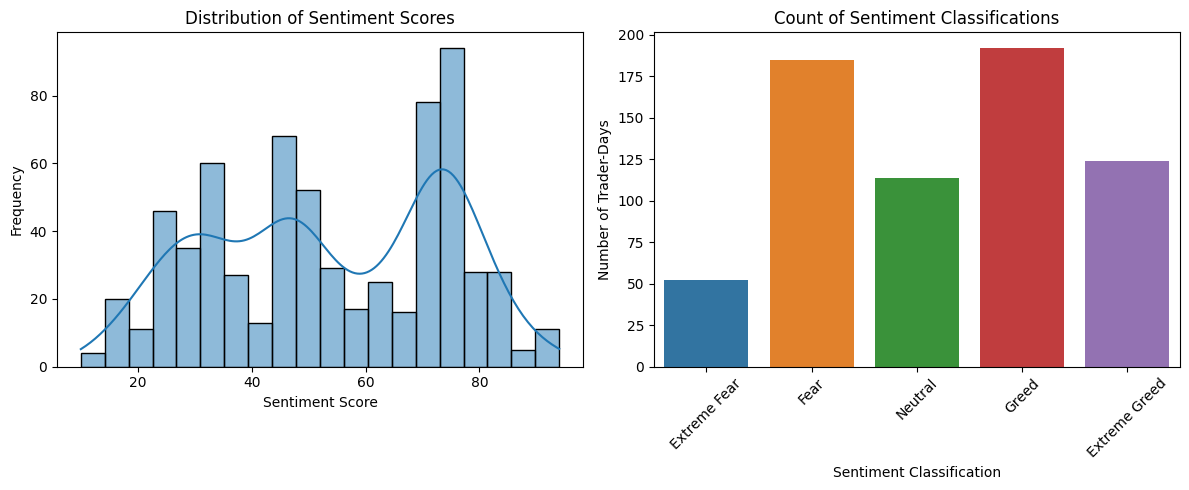

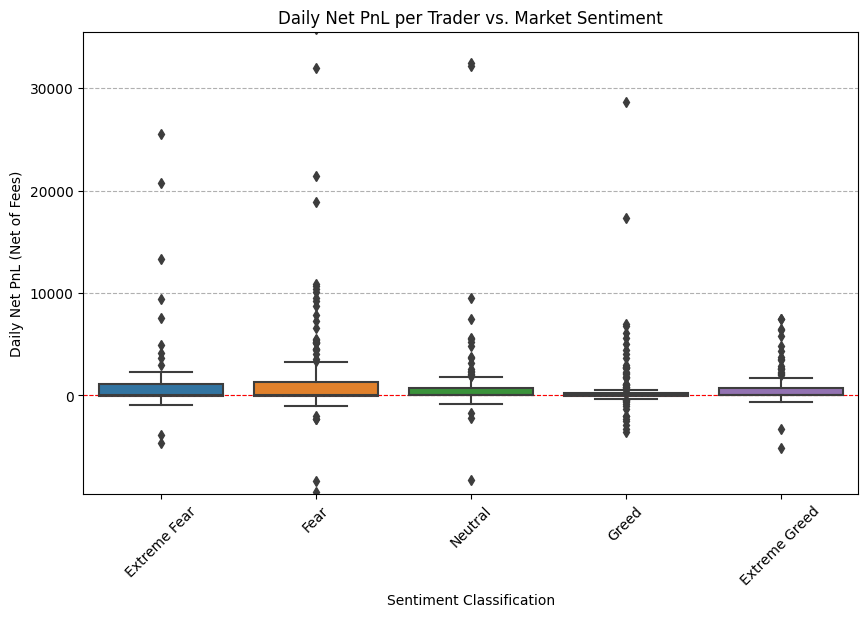

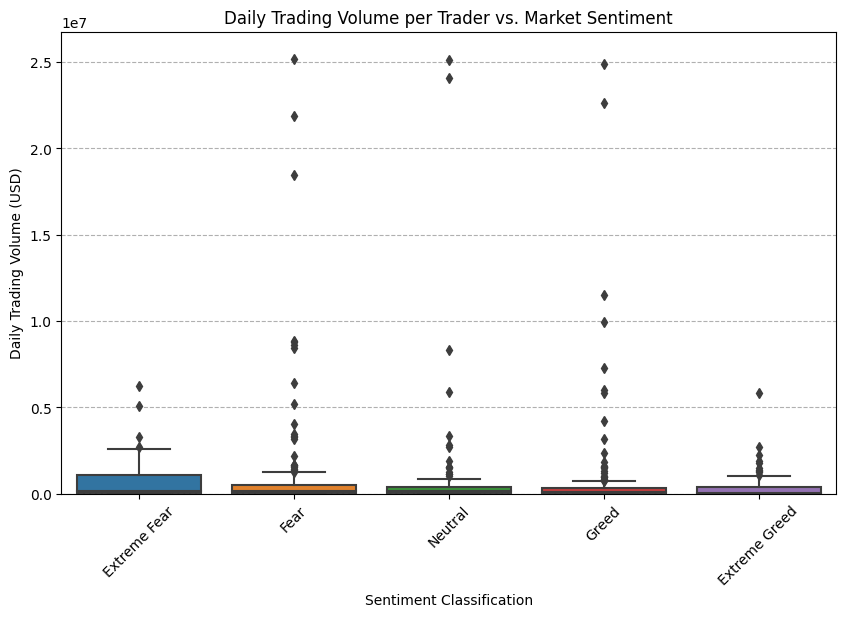

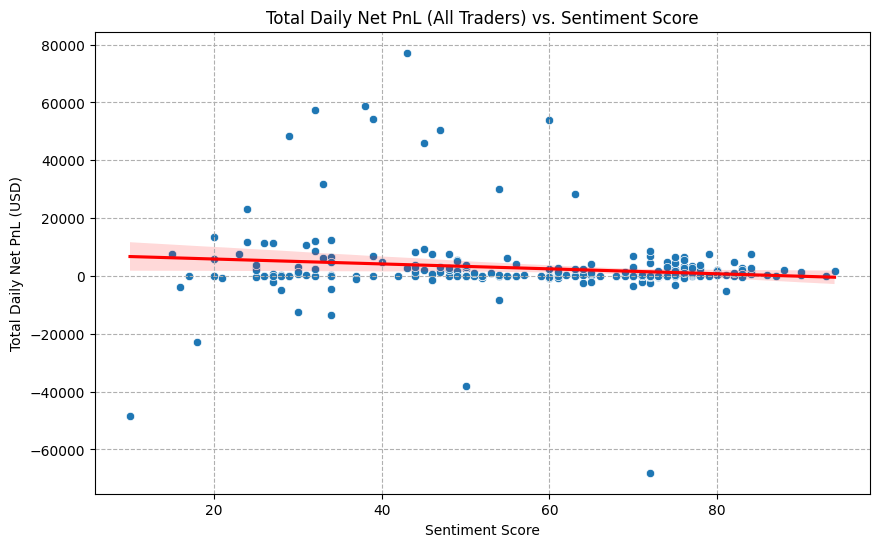

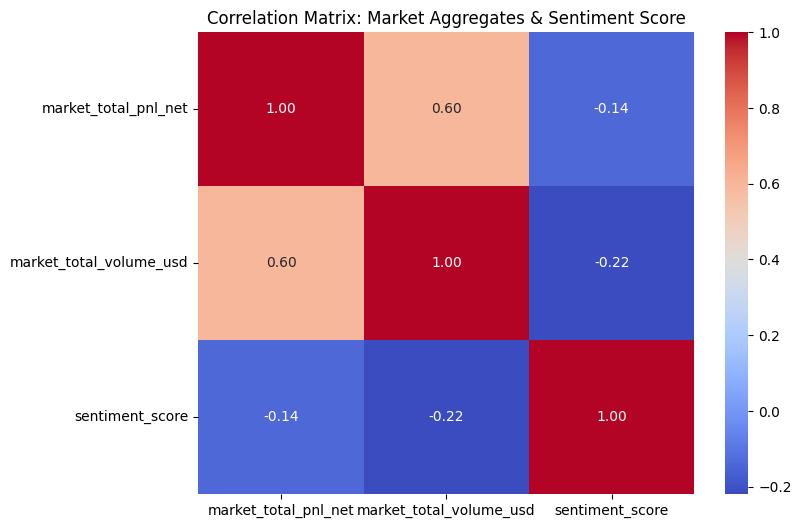


--- Initial EDA plots generated. Examine them for patterns. ---


In [130]:
print("\n--- Exploratory Data Analysis (EDA) ---")

if not merged_df.empty:
    # 1. Distribution of Sentiment Scores and Classifications
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(merged_df['sentiment_score'], kde=True, bins=20)
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    # Filter for present categories to avoid errors if some are missing in the data
    present_categories = [cat for cat in sentiment_order if cat in merged_df['sentiment_classification'].unique()]
    if present_categories:
        sns.countplot(data=merged_df, x='sentiment_classification', order=present_categories)
        plt.title('Count of Sentiment Classifications')
        plt.xlabel('Sentiment Classification')
        plt.ylabel('Number of Trader-Days')
        plt.xticks(rotation=45)
    else:
        plt.title("No sentiment classifications found for plotting.")

    plt.tight_layout()
    plt.show()

    # 2. Trader Performance (Net PnL) vs. Sentiment
    if present_categories:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=merged_df, x='sentiment_classification', y='daily_net_pnl_net', order=present_categories)
        plt.title('Daily Net PnL per Trader vs. Market Sentiment')
        plt.xlabel('Sentiment Classification')
        plt.ylabel('Daily Net PnL (Net of Fees)')
        plt.axhline(0, color='red', linestyle='--', lw=0.8)
        
        pnl_q01 = merged_df['daily_net_pnl_net'].quantile(0.01)
        pnl_q99 = merged_df['daily_net_pnl_net'].quantile(0.99)
        plt.ylim(pnl_q01 - abs(pnl_q01*0.1), pnl_q99 + abs(pnl_q99*0.1))
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--')
        plt.show()

    # 3. Trading Volume vs. Sentiment
    if present_categories:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=merged_df, x='sentiment_classification', y='daily_trade_volume_usd', order=present_categories)
        plt.title('Daily Trading Volume per Trader vs. Market Sentiment')
        plt.xlabel('Sentiment Classification')
        plt.ylabel('Daily Trading Volume (USD)')
        vol_q99 = merged_df['daily_trade_volume_usd'].quantile(0.99)
        plt.ylim(0, vol_q99 + abs(vol_q99*0.1)) # Add a small margin
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--')
        plt.show()

    # 4. Aggregate Market-Level PnL vs. Sentiment Score
    market_daily_summary = merged_df.groupby('Trade_Date').agg(
        market_total_pnl_net=('daily_net_pnl_net', 'sum'),
        market_total_volume_usd=('daily_trade_volume_usd', 'sum'),
        sentiment_score=('sentiment_score', 'first') # Sentiment score is the same for all traders on a given day
    ).reset_index()

    if not market_daily_summary.empty:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=market_daily_summary, x='sentiment_score', y='market_total_pnl_net')
        sns.regplot(data=market_daily_summary, x='sentiment_score', y='market_total_pnl_net', scatter=False, color='red') # Add regression line
        plt.title('Total Daily Net PnL (All Traders) vs. Sentiment Score')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Total Daily Net PnL (USD)')
        plt.grid(True, linestyle='--')
        plt.show()

        # Correlation Heatmap
        correlation_cols = ['market_total_pnl_net', 'market_total_volume_usd', 'sentiment_score']
        correlation_matrix = market_daily_summary[correlation_cols].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix: Market Aggregates & Sentiment Score')
        plt.show()
else:
    print("Skipping EDA as merged_df is empty.")

print("\n--- Initial EDA plots generated. Examine them for patterns. ---")

In [131]:
print(" Consistent Account Performance by Sentiment ---")


if not all(col in merged_df.columns for col in ['sentiment_classification', 'Account', 'daily_net_pnl_net', 'Trade_Date']):
    print("Error: Required columns for Insight 3 not found in merged_df.")
else:
    if not merged_df.empty:
        MIN_TRADING_DAYS_IN_SENTIMENT = 5  # Adjustable
        MIN_AVG_PNL_THRESHOLD = 0          # Adjustable (e.g., > 0 for profitable)
        

        consistent_performers_summary = {} # To store summary DataFrames

        unique_sentiments = merged_df['sentiment_classification'].dropna().unique()

        for sentiment_state in unique_sentiments:
            sentiment_specific_data = merged_df[merged_df['sentiment_classification'] == sentiment_state]
            
            if sentiment_specific_data.empty:
                continue

            account_performance_in_sentiment = sentiment_specific_data.groupby('Account').agg(
                avg_pnl=('daily_net_pnl_net', 'mean'),
                total_pnl=('daily_net_pnl_net', 'sum'),
                trade_days=('Trade_Date', 'nunique'), # nunique for distinct days
                win_rate=('daily_net_pnl_net', lambda x: (x > 0).mean() if not x.empty else 0)
            ).reset_index()

            well_performing_accounts = account_performance_in_sentiment[
                (account_performance_in_sentiment['trade_days'] >= MIN_TRADING_DAYS_IN_SENTIMENT) &
                (account_performance_in_sentiment['avg_pnl'] > MIN_AVG_PNL_THRESHOLD)
                
            ].sort_values(by='avg_pnl', ascending=False)

            if not well_performing_accounts.empty:
                consistent_performers_summary[sentiment_state] = well_performing_accounts
                print(f"\n--- Top accounts performing well during '{sentiment_state}' (Criteria: Min Days={MIN_TRADING_DAYS_IN_SENTIMENT}, Avg PnL>{MIN_AVG_PNL_THRESHOLD}) ---")
                print(well_performing_accounts.head())
            else:
               
                consistent_performers_summary[sentiment_state] = pd.DataFrame(columns=account_performance_in_sentiment.columns)


        # Analyze accounts performing well across multiple sentiments
        if consistent_performers_summary:
            all_performers_list = []
            for sentiment, df_perf in consistent_performers_summary.items():
                if not df_perf.empty:
                    df_perf_copy = df_perf.copy() # Avoid SettingWithCopyWarning
                    df_perf_copy['performing_sentiment'] = sentiment
                    all_performers_list.append(df_perf_copy[['Account', 'performing_sentiment', 'avg_pnl', 'trade_days', 'win_rate']])
            
            if all_performers_list:
                combined_performers_df = pd.concat(all_performers_list)
                versatile_accounts_df = combined_performers_df.groupby('Account')['performing_sentiment'].count().reset_index(name='num_sentiment_specialties')
                versatile_accounts_df = versatile_accounts_df[versatile_accounts_df['num_sentiment_specialties'] > 1].sort_values(by='num_sentiment_specialties', ascending=False)
                
                print("\n--- Accounts performing well in MULTIPLE sentiment states (Top 10) ---")
                if not versatile_accounts_df.empty:
                    print(versatile_accounts_df.head(10))
                    
                else:
                    print("No accounts found performing well across multiple sentiment states with current criteria.")
            else:
                print("No accounts found meeting criteria in any sentiment state to check for versatility.")
    else:
        print("merged_df is empty. Cannot perform analysis.")

 Consistent Account Performance by Sentiment ---

--- Top accounts performing well during 'Extreme Greed' (Criteria: Min Days=5, Avg PnL>0) ---
                                      Account      avg_pnl     total_pnl  \
4  0x4f93fead39b70a1824f981a54d4e55b278e9f760  1537.813372  87655.362223   
6  0x8477e447846c758f5a675856001ea72298fd9cb5    37.433623    673.805218   
0  0x28736f43f1e871e6aa8b1148d38d4994275d72c4    17.960061    377.161279   

   trade_days  win_rate  
4          57  0.824561  
6          18  0.666667  
0          21  0.714286  

--- Top accounts performing well during 'Greed' (Criteria: Min Days=5, Avg PnL>0) ---
                                      Account       avg_pnl     total_pnl  \
9  0x513b8629fe877bb581bf244e326a047b249c4ff1  13424.539710  80547.238259   
8  0x4f93fead39b70a1824f981a54d4e55b278e9f760   1243.800941  67165.250819   
2  0x28736f43f1e871e6aa8b1148d38d4994275d72c4    130.543305   4046.842454   

   trade_days  win_rate  
9           6  0.500000  

In [132]:
print("Outlier/Anomaly Detection ---")

# Ensure necessary columns exist
if not all(col in merged_df.columns for col in ['Account', 'Trade_Date', 'daily_net_pnl_net', 'daily_trade_volume_usd', 'sentiment_classification']):
    print("Error: Required columns for Insight 4 not found in merged_df.")
else:
    if not merged_df.empty:
        # A. Extreme PnL days (Z-score method)
        pnl_col = 'daily_net_pnl_net'
        pnl_mean = merged_df[pnl_col].mean()
        pnl_std = merged_df[pnl_col].std()
        
        if pnl_std > 1e-6 : 
            pnl_threshold_upper = pnl_mean + 3 * pnl_std
            pnl_threshold_lower = pnl_mean - 3 * pnl_std

            extreme_pnl_days = merged_df[
                (merged_df[pnl_col] > pnl_threshold_upper) |
                (merged_df[pnl_col] < pnl_threshold_lower)
            ]
            print(f"\n--- Trader-days with Extreme PnL (beyond +/-3 std dev from mean of {pnl_mean:.2f}; Thresholds: <{pnl_threshold_lower:.2f} or >{pnl_threshold_upper:.2f}) ---")
            if not extreme_pnl_days.empty:
                print(extreme_pnl_days[['Trade_Date', 'Account', pnl_col, 'sentiment_classification']].sort_values(by=pnl_col, ascending=False).head(10))
            else:
                print("No extreme PnL days found using +/-3 std dev.")
        else:
            print(f"Standard deviation of '{pnl_col}' is too small ({pnl_std:.2e}) for Z-score outlier detection.")


        # B. Extreme Volume days (Z-score method)
        vol_col = 'daily_trade_volume_usd'
        vol_mean = merged_df[vol_col].mean()
        vol_std = merged_df[vol_col].std()

        if vol_std > 1e-6: 
            vol_threshold_upper = vol_mean + 3 * vol_std
            extreme_volume_days = merged_df[merged_df[vol_col] > vol_threshold_upper]
            print(f"\n--- Trader-days with Extreme Volume (beyond +3 std dev from mean of {vol_mean:.2f}; Threshold: >{vol_threshold_upper:.2f}) ---")
            if not extreme_volume_days.empty:
                print(extreme_volume_days[['Trade_Date', 'Account', vol_col, 'sentiment_classification']].sort_values(by=vol_col, ascending=False).head(10))
            else:
                print("No extreme volume days found using +3 std dev.")
        else:
            print(f"Standard deviation of '{vol_col}' is too small ({vol_std:.2e}) for Z-score outlier detection.")

        
        if 'consistent_performers_summary' in locals() and consistent_performers_summary:
            print("\n--- Potential Anomalous High Win Rates in Specific Sentiments (from Cell 3 analysis) ---")
            MIN_DAYS_FOR_ANOMALOUS_WIN_RATE = MIN_TRADING_DAYS_IN_SENTIMENT + 5 # Stricter, defined in Cell 3
            ANOMALOUS_WIN_RATE_THRESHOLD = 0.85 # e.g., 85%

            found_anomalous_win_rates = False
            for sentiment, df_performers in consistent_performers_summary.items():
                if not df_performers.empty and 'win_rate' in df_performers.columns and 'trade_days' in df_performers.columns:
                    anomalous_win_rate_accounts = df_performers[
                        (df_performers['win_rate'] >= ANOMALOUS_WIN_RATE_THRESHOLD) &
                        (df_performers['trade_days'] >= MIN_DAYS_FOR_ANOMALOUS_WIN_RATE)
                    ]
                    if not anomalous_win_rate_accounts.empty:
                        found_anomalous_win_rates = True
                        print(f"Accounts with >={ANOMALOUS_WIN_RATE_THRESHOLD*100:.0f}% win rate during '{sentiment}' (min {MIN_DAYS_FOR_ANOMALOUS_WIN_RATE} days):")
                        print(anomalous_win_rate_accounts[['Account', 'win_rate', 'avg_pnl', 'trade_days']])
            if not found_anomalous_win_rates:
                 print(f"No accounts found with win rate >= {ANOMALOUS_WIN_RATE_THRESHOLD*100:.0f}% and min {MIN_DAYS_FOR_ANOMALOUS_WIN_RATE} trade days in any specific sentiment.")
        else:
            print("\n'consistent_performers_summary' not found or empty; skipping anomalous win rate check based on it.")
            print("Run Cell 3 first if you want this analysis.")
            
    else:
        print("merged_df is empty. Cannot perform analysis.")

Outlier/Anomaly Detection ---

--- Trader-days with Extreme PnL (beyond +/-3 std dev from mean of 1092.68; Thresholds: <-21873.01 or >24058.38) ---
    Trade_Date                                     Account  daily_net_pnl_net  \
585 2025-04-12  0x513b8629fe877bb581bf244e326a047b249c4ff1       77597.253232   
620 2025-04-19  0x513b8629fe877bb581bf244e326a047b249c4ff1       56696.126813   
661 2025-04-29  0x513b8629fe877bb581bf244e326a047b249c4ff1       53842.655037   
632 2025-04-22  0x513b8629fe877bb581bf244e326a047b249c4ff1       50825.918214   
603 2025-04-15  0x513b8629fe877bb581bf244e326a047b249c4ff1       39554.783210   
610 2025-04-16  0x513b8629fe877bb581bf244e326a047b249c4ff1       35800.823330   
594 2025-04-13  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3       32489.555549   
659 2025-04-28  0x513b8629fe877bb581bf244e326a047b249c4ff1       32203.431234   
618 2025-04-18  0x513b8629fe877bb581bf244e326a047b249c4ff1       31966.328424   
649 2025-04-24  0x513b8629fe877bb581bf244e